<a href="https://colab.research.google.com/github/BuiThanhDam02/ML2023/blob/main/Lab_5_20130217_BuiThanhDam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [ ]:
# code
from sklearn.metrics import accuracy_score 
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from prettytable import  PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



In [ ]:
# code
cancer = datasets.load_breast_cancer()

Xtrain = cancer['data']
ytrain = cancer['target']

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(Xtrain, ytrain)
x_train, x_test, y_train, y_test = train_test_split(Xtrain,ytrain, test_size = 0.3, random_state = 1)

y_pred = clf.predict(x_test)

accSvm =  accuracy_score(y_test, y_pred)
preSvm= metrics.precision_score(y_test, y_pred,average='macro')

recallSvm= metrics.recall_score(y_test, y_pred,average='macro')
f1Svm = metrics.f1_score(y_test, y_pred,average='macro') 

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 60   3]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# logic
Xtrain2 = cancer['data']
ytrain2 = cancer['target']

classifier2 = LogisticRegression() 
classifier2.fit(Xtrain2, ytrain2)


x_train2, x_test2, y_train2, y_test2 = train_test_split(Xtrain2,ytrain2, test_size = 0.3, random_state = 1)
y_pred2 = classifier2.predict(x_test2)



accLog = accuracy_score(y_test2, y_pred2)
preLog=  metrics.precision_score(y_test2, y_pred2,average='macro') 

recallLog= metrics.recall_score(y_test2, y_pred2,average='macro')
f1Log= metrics.f1_score(y_test2, y_pred2,average='macro') 

#Knn
Xtrain4 = cancer['data']
ytrain4 = cancer['target']

y_predKnnBest = 0
bestK = 0
k_range4 = range(1,30,2)
for k in k_range4:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(Xtrain4,ytrain4)
  x_train4, x_test4, y_train4, y_test4 = train_test_split(Xtrain4,ytrain4, test_size = 0.3, random_state = 1)
  y_pred4 = model.predict(x_test4)
  if((y_predKnnBest <= y_pred4).any()):
    y_predKnnBest = y_pred4
    




accKnn = accuracy_score(y_test4, y_predKnnBest)
preKnn = metrics.precision_score(y_test4, y_predKnnBest,average='macro')
recallKnn= metrics.recall_score(y_test4, y_predKnnBest,average='macro')
f1Knn = metrics.f1_score(y_test4, y_predKnnBest,average='macro') 

# decision tree
Xtrain5 = cancer['data']
ytrain5 = cancer['target']
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain5,ytrain5)
x_train5, x_test5, y_train5, y_test5 = train_test_split(Xtrain4,ytrain4, test_size = 0.3, random_state = 1)
y_pred5 = dtc.predict(x_test5)

accDT = accuracy_score(y_test5, y_pred5)
preDT = metrics.precision_score(y_test5, y_pred5,average='macro')
recallDT= metrics.recall_score(y_test5, y_pred5,average='macro')
f1DT = metrics.f1_score(y_test5, y_pred5,average='macro') 


t = PrettyTable(['Name Metric measure','SVM Kernel','Logistic Regression',"KNN",'Decision Tree'])
t.add_row(['Accuracy',accSvm,accLog,accKnn,accDT])
t.add_row(['Precision Score',preSvm,preLog,preKnn,preDT])
t.add_row(['Recall Score',recallSvm,recallLog,recallKnn,recallDT])
t.add_row(['F1',f1Svm,f1Log,f1Knn,f1DT])
print(t)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+--------------------+---------------------+--------------------+---------------+
| Name Metric measure |     SVM Kernel     | Logistic Regression |        KNN         | Decision Tree |
+---------------------+--------------------+---------------------+--------------------+---------------+
|       Accuracy      | 0.9707602339181286 |  0.935672514619883  | 0.9239766081871345 |      1.0      |
|   Precision Score   | 0.9701094998520272 |  0.9297605140186915 | 0.9297360248447204 |      1.0      |
|     Recall Score    | 0.966931216931217  |  0.9325396825396826 | 0.9067460317460317 |      1.0      |
|          F1         | 0.9684792626728111 |  0.9311115180369895 | 0.9162301691977239 |      1.0      |
+---------------------+--------------------+---------------------+--------------------+---------------+


#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures





In [ ]:
# code
Xtraint2 = cancer['data']
ytraint2 = cancer['target']

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(Xtraint2, ytraint2)
x_traint2, x_testt2, y_traint2, y_testt2 = train_test_split(Xtraint2,ytraint2, test_size = 0.3, random_state = 0)

y_predt2 = clf.predict(x_testt2)

accLSvmt2 =  accuracy_score(y_testt2, y_predt2)
preLSvmt2= metrics.precision_score(y_testt2, y_predt2,average='macro')

recallLt2= metrics.recall_score(y_testt2, y_predt2,average='macro')
f1Lt2 = metrics.f1_score(y_testt2, y_predt2,average='macro') 
print(confusion_matrix(y_testt2, y_predt2))
print(classification_report(y_testt2, y_predt2))


[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:

# Polynomial Kernel
XtraintP = cancer['data']
ytraintP = cancer['target']

clf = svm.SVC(kernel='poly')

clf.fit(XtraintP, ytraintP)
x_trainP, x_testP, y_trainP, y_testP = train_test_split(XtraintP,ytraintP, test_size = 0.3, random_state = 0)

y_predP = clf.predict(x_testP)

accPSvm =  accuracy_score(y_testP, y_predP)
prePSvm= metrics.precision_score(y_testP, y_predP,average='macro')

recallP= metrics.recall_score(y_testP, y_predP,average='macro')
f1P = metrics.f1_score(y_testP, y_predP,average='macro') 

# Sigmoid Kernel
XtraintS = cancer['data']
ytraintS = cancer['target']

clf = svm.SVC(kernel='sigmoid')

clf.fit(XtraintS, ytraintS)
x_trainS, x_testS, y_trainS, y_testS = train_test_split(XtraintS,ytraintS, test_size = 0.3, random_state = 0)

y_predS = clf.predict(x_testS)

accSSvm =  accuracy_score(y_testS, y_predS)
preSSvm= metrics.precision_score(y_testS, y_predS,average='macro')

recallS= metrics.recall_score(y_testS, y_predS,average='macro')
f1S = metrics.f1_score(y_testS, y_predS,average='macro') 
# Radial Basis Function Kernel
XtraintR = cancer['data']
ytraintR = cancer['target']

clf = svm.SVC(kernel='rbf')

clf.fit(XtraintR, ytraintR)
x_trainR, x_testR, y_trainR, y_testR = train_test_split(XtraintR,ytraintR, test_size = 0.3, random_state = 0)

y_predR = clf.predict(x_testR)

accRSvm =  accuracy_score(y_testR, y_predR)
preRSvm= metrics.precision_score(y_testR, y_predR,average='macro')

recallR= metrics.recall_score(y_testR, y_predR,average='macro')
f1R = metrics.f1_score(y_testR, y_predR,average='macro') 

t2 = PrettyTable(['Name Metric measure','Linear Kernel','Polynomial Kernel',"Sigmoid Kernel",'Radial Basis Function Kernel'])
t2.add_row(['Accuracy',accLSvmt2,accPSvm,accSSvm,accRSvm])
t2.add_row(['Precision Score',preLSvmt2,prePSvm,preSSvm,preRSvm])
t2.add_row(['Recall Score',recallLt2,recallP,recallS,recallR])
t2.add_row(['F1',f1Lt2,f1P,f1S,f1R])
print(t2)



+---------------------+--------------------+--------------------+---------------------+------------------------------+
| Name Metric measure |   Linear Kernel    | Polynomial Kernel  |    Sigmoid Kernel   | Radial Basis Function Kernel |
+---------------------+--------------------+--------------------+---------------------+------------------------------+
|       Accuracy      | 0.9777777777777777 | 0.9777777777777777 | 0.08888888888888889 |      0.9777777777777777      |
|   Precision Score   | 0.9722222222222222 | 0.9722222222222222 | 0.04301075268817204 |      0.9722222222222222      |
|     Recall Score    | 0.9814814814814815 | 0.9814814814814815 | 0.08333333333333333 |      0.9814814814814815      |
|          F1         | 0.975983436853002  | 0.975983436853002  | 0.05673758865248227 |      0.975983436853002       |
+---------------------+--------------------+--------------------+---------------------+------------------------------+


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


In [ ]:
cancer = datasets.load_digits()

Xtrain = cancer['data']
ytrain = cancer['target']

clf = svm.SVC(kernel='poly') # Linear Kernel

clf.fit(Xtrain, ytrain)
x_train, x_test, y_train, y_test = train_test_split(Xtrain,ytrain, test_size = 0.3, random_state = 1)

y_pred = clf.predict(x_test)

accSvm =  accuracy_score(y_test, y_pred)
preSvm= metrics.precision_score(y_test, y_pred,average='macro')

recallSvm= metrics.recall_score(y_test, y_pred,average='macro')
f1Svm = metrics.f1_score(y_test, y_pred,average='macro') 

In [ ]:
# logic
Xtrain2 = cancer['data']
ytrain2 = cancer['target']

classifier2 = LogisticRegression() 
classifier2.fit(Xtrain2, ytrain2)


x_train2, x_test2, y_train2, y_test2 = train_test_split(Xtrain2,ytrain2, test_size = 0.3, random_state = 1)
y_pred2 = classifier2.predict(x_test2)



accLog = accuracy_score(y_test2, y_pred2)
preLog=  metrics.precision_score(y_test2, y_pred2,average='macro') 

recallLog= metrics.recall_score(y_test2, y_pred2,average='macro')
f1Log= metrics.f1_score(y_test2, y_pred2,average='macro') 

#Knn
Xtrain4 = cancer['data']
ytrain4 = cancer['target']

y_predKnnBest = 0
bestK = 0
k_range4 = range(1,30,2)
for k in k_range4:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(Xtrain4,ytrain4)
  x_train4, x_test4, y_train4, y_test4 = train_test_split(Xtrain4,ytrain4, test_size = 0.3, random_state = 1)
  y_pred4 = model.predict(x_test4)
  if((y_predKnnBest <= y_pred4).any()):
    y_predKnnBest = y_pred4
    




accKnn = accuracy_score(y_test4, y_predKnnBest)
preKnn = metrics.precision_score(y_test4, y_predKnnBest,average='macro')
recallKnn= metrics.recall_score(y_test4, y_predKnnBest,average='macro')
f1Knn = metrics.f1_score(y_test4, y_predKnnBest,average='macro') 

# decision tree
Xtrain5 = cancer['data']
ytrain5 = cancer['target']
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain5,ytrain5)
x_train5, x_test5, y_train5, y_test5 = train_test_split(Xtrain4,ytrain4, test_size = 0.3, random_state = 1)
y_pred5 = dtc.predict(x_test5)

accDT = accuracy_score(y_test5, y_pred5)
preDT = metrics.precision_score(y_test5, y_pred5,average='macro')
recallDT= metrics.recall_score(y_test5, y_pred5,average='macro')
f1DT = metrics.f1_score(y_test5, y_pred5,average='macro') 


t = PrettyTable(['Name Metric measure','SVM Poly Kernel','Logistic Regression',"KNN",'Decision Tree'])
t.add_row(['Accuracy',accSvm,accLog,accKnn,accDT])
t.add_row(['Precision Score',preSvm,preLog,preKnn,preDT])
t.add_row(['Recall Score',recallSvm,recallLog,recallKnn,recallDT])
t.add_row(['F1',f1Svm,f1Log,f1Knn,f1DT])
print(t)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+-----------------+---------------------+--------------------+---------------+
| Name Metric measure | SVM Poly Kernel | Logistic Regression |        KNN         | Decision Tree |
+---------------------+-----------------+---------------------+--------------------+---------------+
|       Accuracy      |       1.0       |         1.0         | 0.9777777777777777 |      1.0      |
|   Precision Score   |       1.0       |         1.0         | 0.9781161374204809 |      1.0      |
|     Recall Score    |       1.0       |         1.0         | 0.9776054225716277 |      1.0      |
|          F1         |       1.0       |         1.0         | 0.9775619349405023 |      1.0      |
+---------------------+-----------------+---------------------+--------------------+---------------+


#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



In [ ]:
# code
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ColabNotebooks'
dataset=pd.read_csv("creditcard.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ColabNotebooks


In [ ]:
train,validation, test = np.split(dataset.sample(frac=1), [int(.6*len(dataset)),
int(.8*len(dataset))])

X_train4 = train[[train.columns[i] for i in range(train.shape[1]-1) ]]
Y_train4 = train[train.columns[-1]]
# Assign the test split
X_test4 = test[[test.columns[i] for i in range(train.shape[1]-1) ]]
Y_test4 = test[test.columns[-1]]

In [ ]:
classifier4 = LogisticRegression(random_state = 0)
classifier4.fit(X_train4, Y_train4) 

y_predReg4 = classifier4.predict(X_test4)

preReg4=metrics.precision_score(Y_test4, y_predReg4,average='macro')
recReg4=metrics.recall_score(Y_test4, y_predReg4,average="macro")
f1ScoreReg4=metrics.f1_score(Y_test4, y_predReg4,average="macro")
accReg4=accuracy_score(Y_test4, y_predReg4)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

model4 = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
model4.fit(X_train4,Y_train4)
#Predict Output
y_predKNN4 = model4.predict(X_test4) 

preKNN4=metrics.precision_score(Y_test4, y_predKNN4,average='macro')
recKNN4=metrics.recall_score(Y_test4, y_predKNN4,average="macro")
f1ScoreKNN4=metrics.f1_score(Y_test4, y_predKNN4,average="macro")
accKNN4=accuracy_score(Y_test4, y_predKNN4)

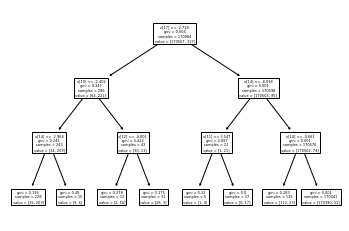

In [ ]:
from sklearn import tree
clf_modelDecisionTree4 = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_modelDecisionTree4.fit(X_train4,Y_train4)
# Plot decision tree
tree.plot_tree(clf_modelDecisionTree4)

y_predDecisionTree4 = clf_modelDecisionTree4.predict(X_test4)

preDecisionTree4=metrics.precision_score(Y_test4, y_predDecisionTree4,average='macro')
recDecisionTree4=metrics.recall_score(Y_test4, y_predDecisionTree4,average="macro")
f1ScoreDecisionTree4=metrics.f1_score(Y_test4, y_predDecisionTree4,average="macro")
accDecisionTree4=accuracy_score(Y_test4, y_predDecisionTree4)

In [ ]:
clfLinear4 = svm.SVC(kernel='linear') # linear kernel
clfLinear4.fit(X_train4, Y_train4)

#Predict the response for test dataset
y_predSVMLinear4 = clfLinear4.predict(X_test4)

preSVMLinear4=metrics.precision_score(Y_test4, y_predSVMLinear4,average='macro')
recSVMLinear4=metrics.recall_score(Y_test4, y_predSVMLinear4,average="macro")
f1ScoreSVMLinear4=metrics.f1_score(Y_test4, y_predSVMLinear4,average="macro")
accSVMLinear4=accuracy_score(Y_test4, y_predSVMLinear4)

In [ ]:

t=PrettyTable(['Name metric mesura','Linear kernel','Logistic Regression','kNN','Decision Tree'])
t.add_row(['Accuracy',accSVMLinear4,accReg4,accKNN4,accDecisionTree4])
t.add_row(['Precision',preSVMLinear4,preReg4,preKNN4,preDecisionTree4])
t.add_row(['Recall',recReg4,recReg4,recKNN4,recDecisionTree4])
t.add_row(['F1 measures',f1ScoreSVMLinear4,f1ScoreReg4,f1ScoreKNN4,f1ScoreDecisionTree4])
print(t)


#Finally,
Save a copy in your Github. Remember renaming the notebook.